# Decison Trees

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("PastHires.csv")

In [3]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
Years Experience      13 non-null int64
Employed?             13 non-null object
Previous employers    13 non-null int64
Level of Education    13 non-null object
Top-tier school       13 non-null object
Interned              13 non-null object
Hired                 13 non-null object
dtypes: int64(2), object(5)
memory usage: 808.0+ bytes


In [5]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


## Converting Categorical data into Numerical data

In [6]:
employee_dict = {
    'N': 0,
    'Y': 1
}

In [7]:
data['Employed?'] = data['Employed?'].map(employee_dict)

In [8]:
data['Employed?'].head()

0    1
1    0
2    0
3    1
4    0
Name: Employed?, dtype: int64

### View data for all the categorical data

In [9]:
import numpy as np

In [10]:
data.describe(include=[np.object])

,Level of Education,Top-tier school,Interned,Hired
count,13,13,13,13
unique,3,2,2,2
top,BS,N,N,Y
freq,7,7,8,9


In [11]:
data['Top-tier school'] = data['Top-tier school'].map(employee_dict)
data['Interned'] = data['Interned'].map(employee_dict)
data['Hired'] = data['Hired'].map(employee_dict)

In [12]:
data['Level of Education'].unique()

array(['BS', 'MS', 'PhD'], dtype=object)

In [13]:
education_dict = {
    'BS': 0,
    'MS': 1,
    'PhD': 2
}
data['Level of Education'] = data['Level of Education'].map(education_dict)

In [14]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [15]:
data.describe()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,5.153846,0.384615,1.769231,0.769231,0.461538,0.384615,0.692308
std,6.348834,0.506370,2.006400,0.926809,0.518875,0.506370,0.480384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,20.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000


### Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [16]:
features = list(data.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

### Import Scikit-Learn library and perform Machine Learning

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
decision_tree_model = DecisionTreeClassifier()

In [19]:
X = data[features]
X.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0


In [20]:
Y = data['Hired']
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: Hired, dtype: int64

In [21]:
decision_tree_model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
prediction = decision_tree_model.predict([[4, 1, 2, 0, 0, 1]])
prediction

array([1], dtype=int64)

### Visualize the Decision Tree structure

In [23]:
from sklearn import tree

### Link for GraphViz file 

[https://graphviz.gitlab.io/_pages/Download/Download_windows.html]

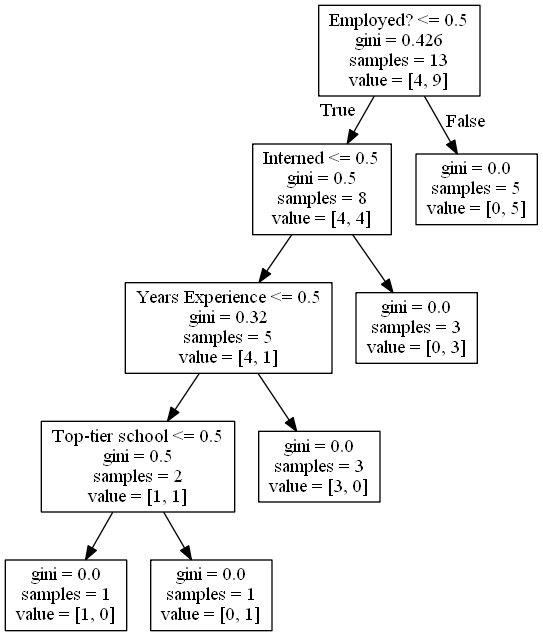

In [24]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(decision_tree_model, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Hiring-Decision.png")
Image(graph.create_png())  

In [25]:
data

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0
